In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
# importing the calories data into a pandas data frame
calories_data = pd.read_csv('/content/calories.csv')

In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
# combining the two data frames , using column-wise addition (axis=1)
calories_dataset = pd.concat([exercise_data,calories_data['Calories']],axis=1)

In [ ]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
calories_dataset.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [ ]:
# lets get an idea about no. of columns and rows
calories_dataset.shape

(15000, 9)

In [ ]:
# statistical measures
calories_dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
calories_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# its clear , but lets check for the no. of missing values for each label
calories_dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

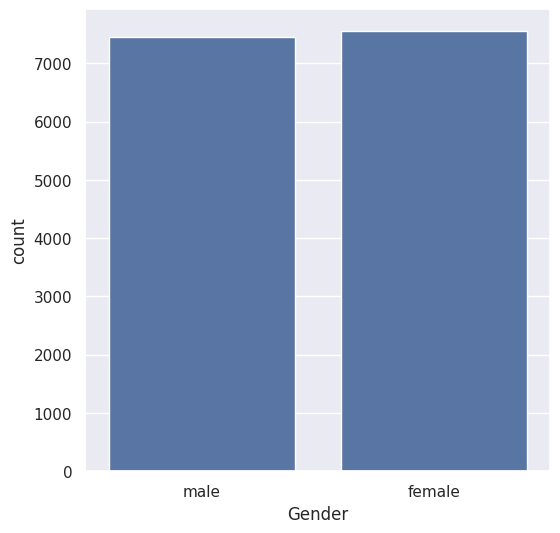

In [ ]:
# Data visualising //
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=calories_dataset)
plt.show()

In [ ]:
calories_dataset['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

<ipython-input-38-771c61baed34>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Age'])


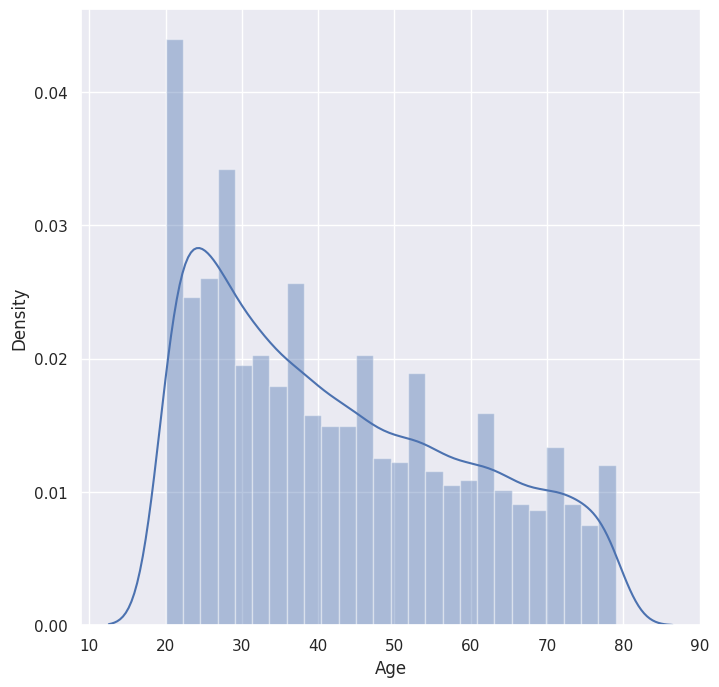

In [ ]:
# distribution plots
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Age'])
plt.show()

<ipython-input-39-026897ea87db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Height'])


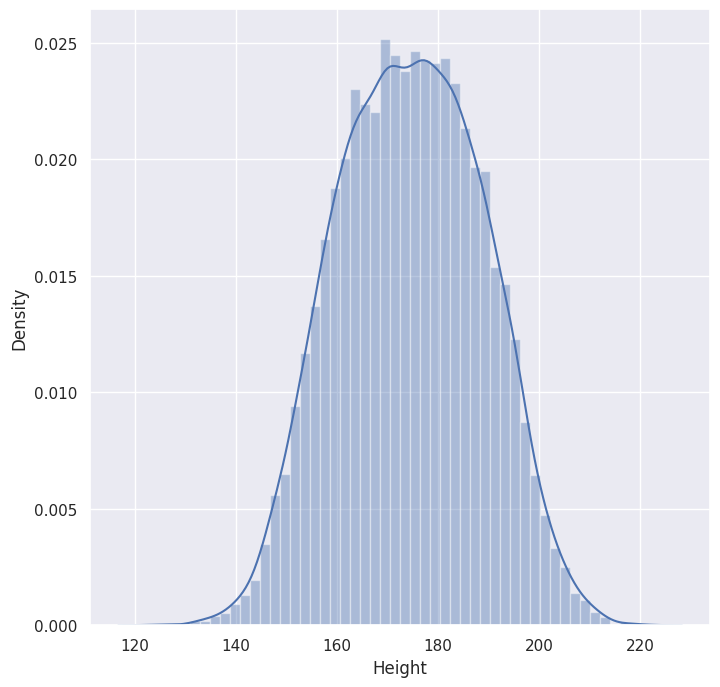

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Height'])
plt.show()

<ipython-input-40-c4f2a3313d72>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Weight'])


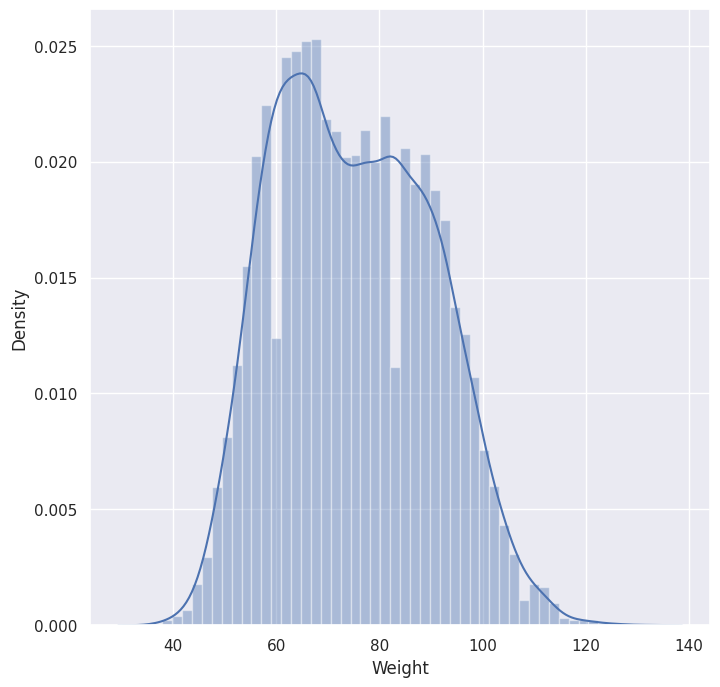

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Weight'])
plt.show()

<ipython-input-41-5e9905c1d031>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Duration'])


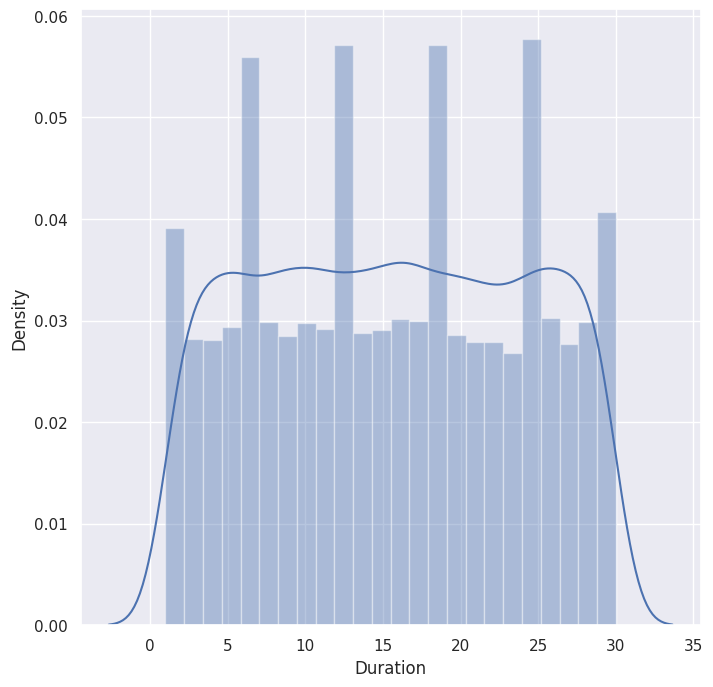

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Duration'])
plt.show()

<ipython-input-42-aa13a061bff8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Heart_Rate'])


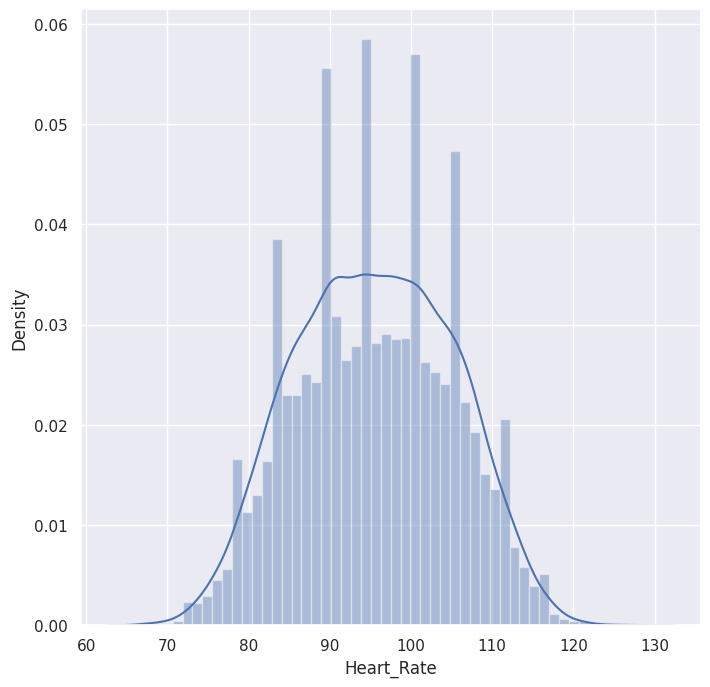

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Heart_Rate'])
plt.show()

<ipython-input-43-f797be0ea91e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Body_Temp'])


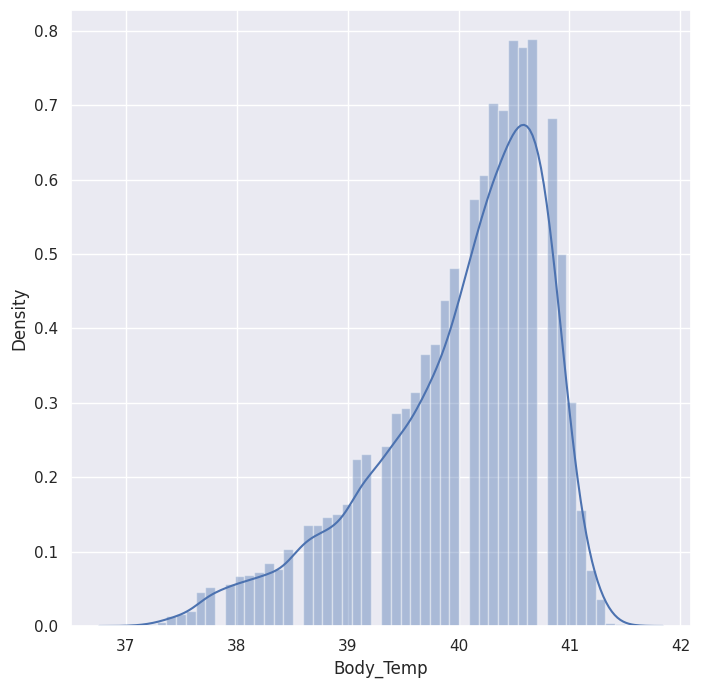

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Body_Temp'])
plt.show()

<ipython-input-44-6962d82e3921>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_dataset['Calories'])


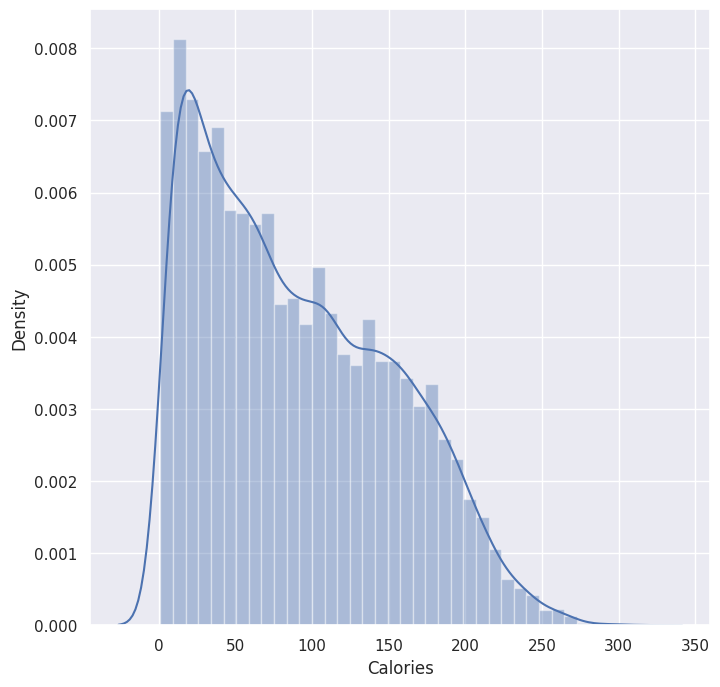

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(calories_dataset['Calories'])
plt.show()

In [ ]:
calories_dataset['Gender'].value_counts()
# so there are only male and female

Gender
female    7553
male      7447
Name: count, dtype: int64

In [ ]:
# encoding of the sex :
calories_dataset.replace({'Gender':{'male':0,'female':1}},inplace = True)

In [ ]:
# finding the correlation in the datasets
# + ve and - ve correlation -->> directly and inversely proportional
correlation = calories_dataset.corr()

<Axes: >

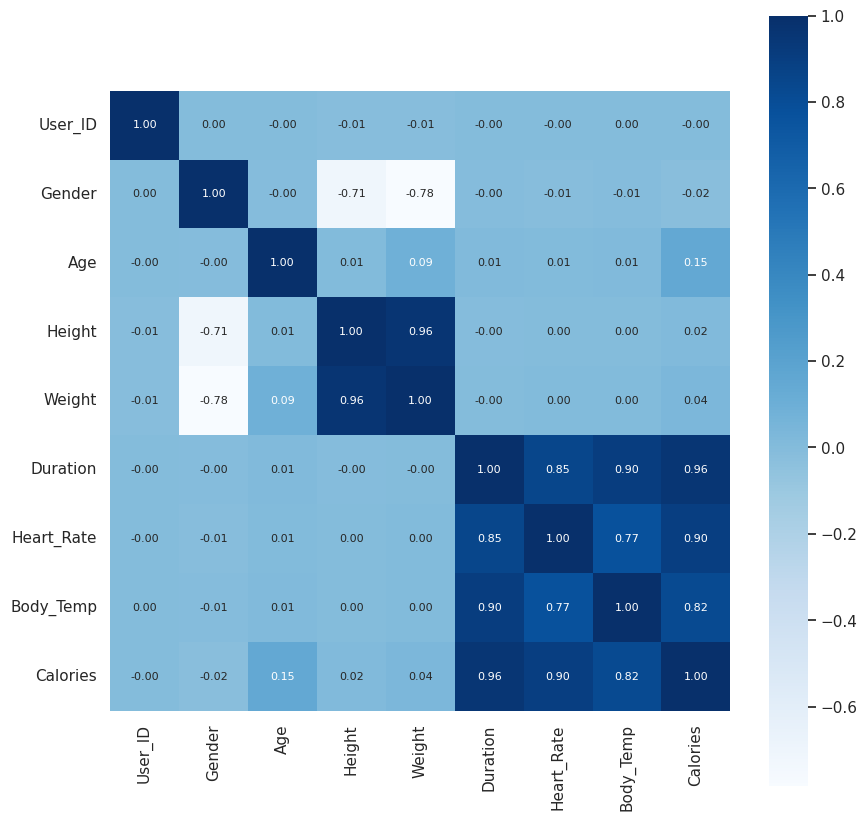

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True , fmt = '.2f',annot=True, annot_kws={'size':8},cmap='Blues')

In [ ]:
calories_dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
X = calories_dataset.drop(columns=['User_ID','Calories'],axis=1)
Y = calories_dataset['Calories']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12000, 7)
(12000,)
(3000, 7)
(3000,)


In [ ]:
# making and training the model
model = XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# checking the r squared errors on train set and test set

train_prediction = model.predict(X_train)
train_error = metrics.r2_score(train_prediction , Y_train)
print(train_error)

# if this value is less than one then our model does pretty well

0.9995692990257089


In [ ]:
test_prediction = model.predict(X_test)
test_error = metrics.r2_score(test_prediction , Y_test)
print(test_error)

# if this value is less than one then our model does pretty well

0.9987986496234057


In [ ]:
# checking the mean absolute errors on train set and test set
train_error2 = metrics.mean_absolute_error(train_prediction , Y_train)
print(train_error2)

test_error2 = metrics.mean_absolute_error(test_prediction , Y_test)
print(test_error2)



0.9322033420062313
1.4833678883314132


In [ ]:
# these are good values of error , there is no general criteria for value of mean absolute error , it depends on the problem
# we can make a predictive system too

# building a predictive system //
input_data = (1,32,157.0,54.0,18.0,93.0,40.4)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('predicted answer is : ' , prediction)
print('The correct answer is : 88.0')

predicted answer is :  [88.31195]
The correct answer is : 88.0


In [ ]:
# that's a pretty well prediction
# see the power of machine learning

In [ ]:
print("Please Bhagwaan Ji 20+ LPA ki placement lagwaado 🙏🙏")

Please Bhagwaan Ji 20+ LPA ki placement lagwaado 🙏🙏


In [ ]:
print('Please')

Please
